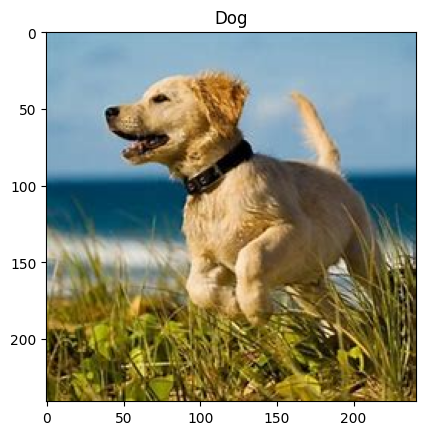

In [8]:
import imghdr
import cv2 as cv
import matplotlib.pyplot as ply
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from glob import glob
import os
 
img = cv.imread('dog.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.title('Dog')
plt.show()

In [18]:
dog_files = glob(r'P:\DSA practice\images\cat_dog\training_set\dogs\*.jpg')
cat_files = glob(r'P:\DSA practice\images\cat_dog\training_set\cats\*.jpg')

In [49]:
img = plt.imread(cat_files[34]) 
print(img.shape)
print(img)

(375, 499, 3)
[[[152 147 141]
  [153 148 142]
  [154 149 143]
  ...
  [ 33  33  35]
  [ 32  33  35]
  [ 32  33  35]]

 [[152 147 141]
  [153 148 142]
  [155 150 144]
  ...
  [ 38  38  40]
  [ 37  38  40]
  [ 37  38  40]]

 [[154 149 143]
  [154 149 143]
  [156 151 145]
  ...
  [ 43  43  43]
  [ 42  44  43]
  [ 42  44  43]]

 ...

 [[ 91  92  87]
  [ 92  93  88]
  [ 94  95  90]
  ...
  [162 150 138]
  [160 150 140]
  [162 149 140]]

 [[ 90  91  86]
  [ 91  92  87]
  [ 93  94  89]
  ...
  [159 146 137]
  [159 146 137]
  [160 146 137]]

 [[ 90  91  86]
  [ 91  92  87]
  [ 92  93  88]
  ...
  [159 145 136]
  [159 145 136]
  [161 144 136]]]


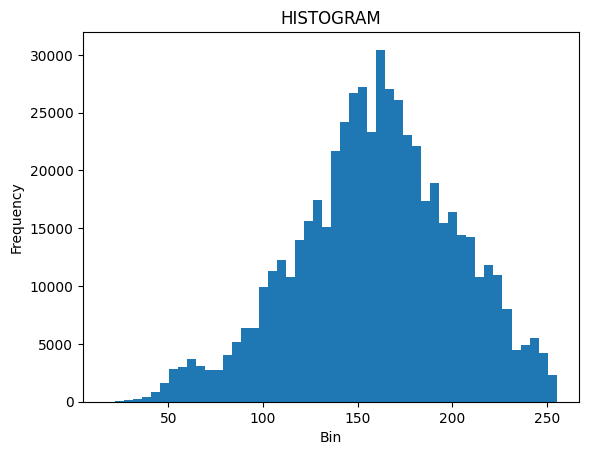

In [50]:
# pd.Series(img.flatten()).plot( kind = 'hist', bins=50, title='HISTOGRAM')
flat = np.ravel(img)
plt.hist(flat, bins=50, histtype='bar')
plt.title('HISTOGRAM')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.show()
# print(flat)

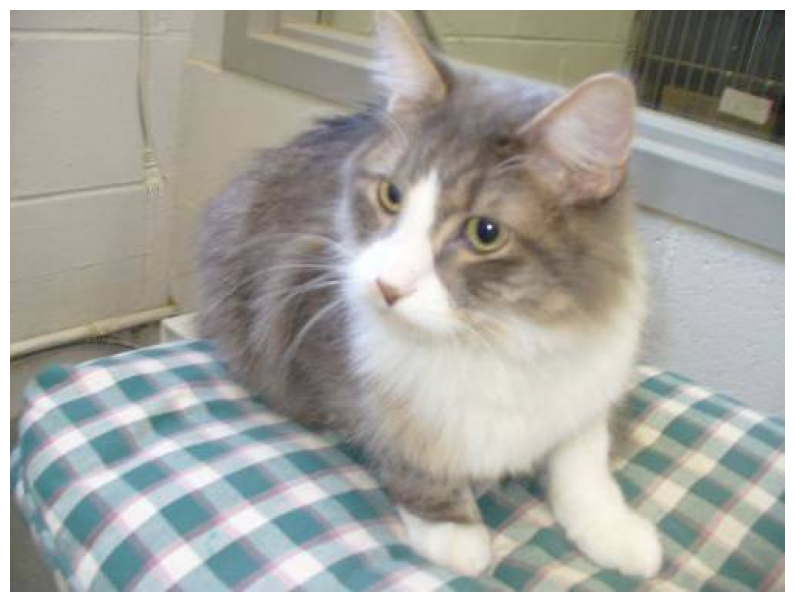

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
ax.axis('off')
plt.show()

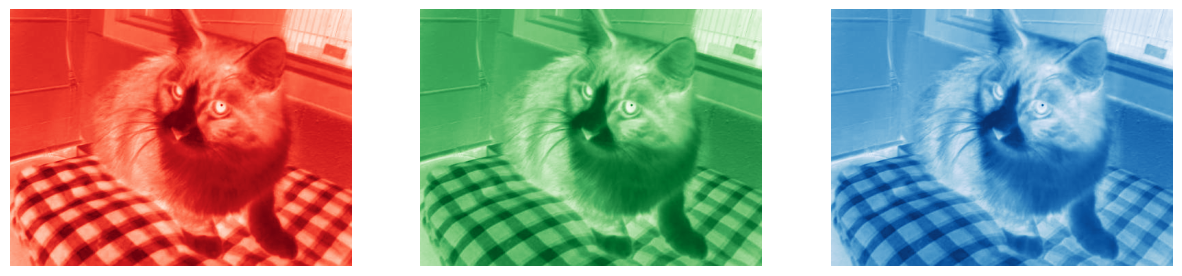

In [61]:
fig, axs = plt.subplots(1,3,figsize = (15,5))
axs[0].imshow(img[:,:,0], cmap = 'Reds')
axs[1].imshow(img[:,:,1], cmap = 'Greens')
axs[2].imshow(img[:,:,2], cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()


Matplotlib vs opencv

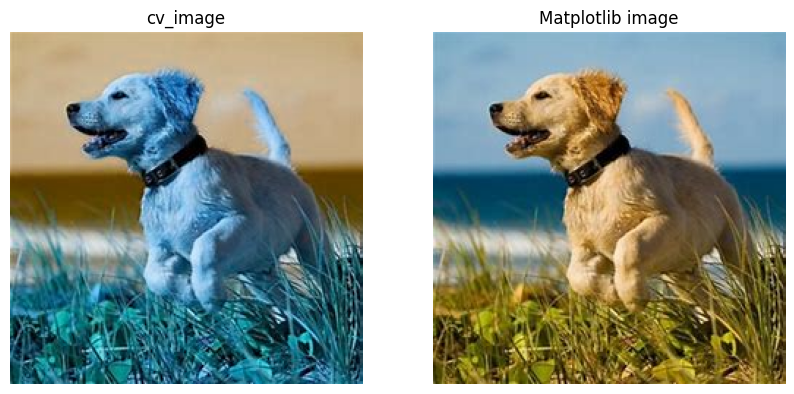

In [60]:
img_cv = cv.imread('dog.jpg')
img_plt = plt.imread('dog.jpg')
fig, axs = plt.subplots(1,2,figsize = (10,15))
axs[0].imshow(img_cv)
axs[1].imshow(img_plt)
axs[1].set_title('Matplotlib image')
axs[0].set_title('cv_image')
axs[0].axis('off')
axs[1].axis('off')
plt.show()

Image Manipulation

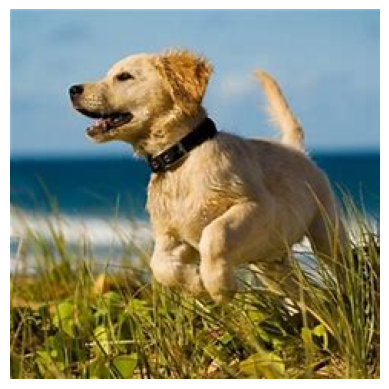

In [64]:
img_plt = plt.imread('dog.jpg')
plt.imshow(img_plt)
plt.axis('off')
plt.show()

size of image (375, 499, 3)
size of resized image (94, 125, 3)


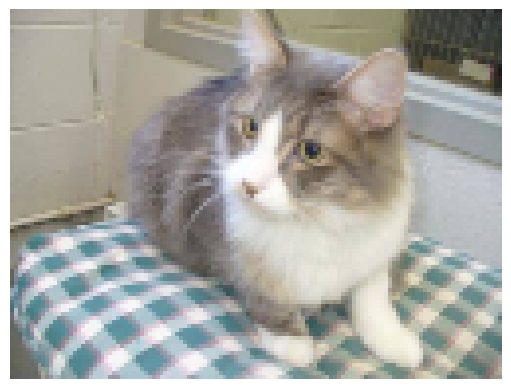

In [70]:
# resize and rescaling
print('size of image',img.shape)
resize_img = cv.resize(img, None, fx=0.25, fy=0.25)  #by certaing percentage
print('size of resized image', resize_img.shape)
plt.axis('off')
plt.imshow(resize_img)
plt.show()


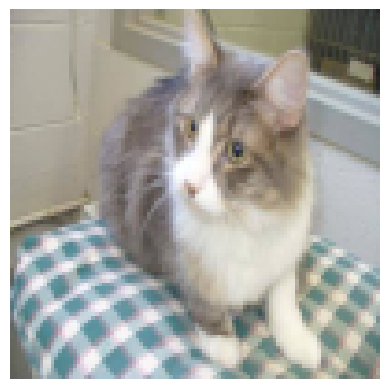

In [81]:
re_img = cv.resize(img, (100, 100), interpolation = cv.INTER_AREA)
plt.imshow(re_img)
plt.axis('off')
plt.show()

(1125, 1497, 3)


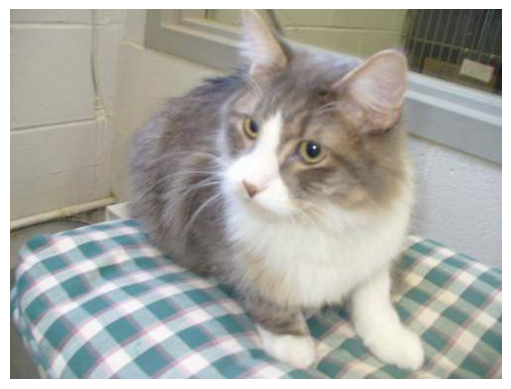

In [84]:
# increasing size
lar_img = cv.resize(img, (img.shape[1]*3, img.shape[0]*3), interpolation = cv.INTER_CUBIC)
print(lar_img.shape)
plt.imshow(lar_img)
plt.axis('off')
plt.show()

Sharpening and blurring

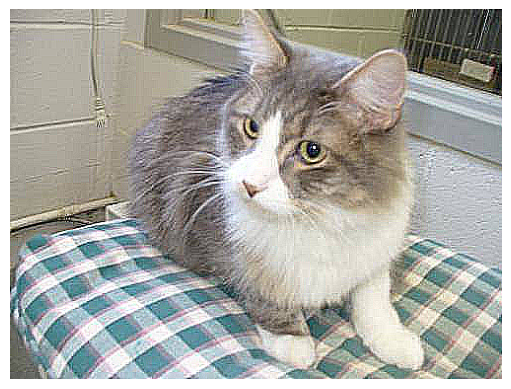

In [85]:
# sharpening
kernel_sharp = np.array([[-1,-1,-1],
                         [-1,9,-1],
                         [-1,-1,-1]])
sharp_img = cv.filter2D(img, -1, kernel_sharp)
plt.imshow(sharp_img)
plt.axis('off')
plt.show()

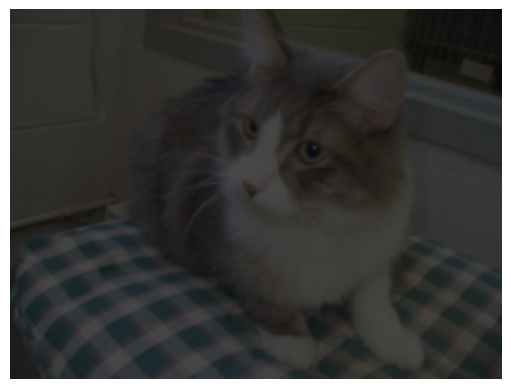

In [92]:
kernel_blur = np.ones((3,3), dtype= 'float32')/2
kernel_blur = kernel_blur/16
blur_img = cv.filter2D(img, -1, kernel_blur)
plt.imshow(blur_img)
plt.axis('off')
plt.show()

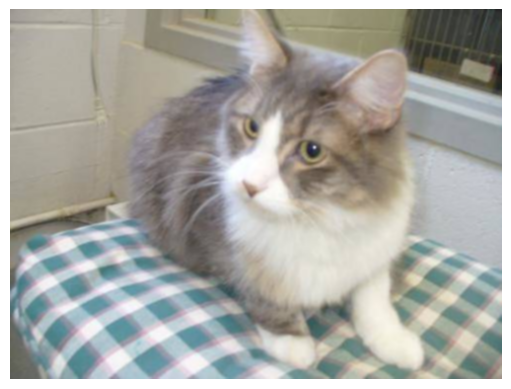

In [87]:
# Gaussian blur
kernel_blur = np.array([[1,2,1],
                         [2,4,2],
                         [1,2,1]])
kernel_blur = kernel_blur/16
blur_img = cv.filter2D(img, -1, kernel_blur)
plt.imshow(blur_img)
plt.axis('off')
plt.show()

In [94]:
# save the image
plt.imsave('blur_img.png', blur_img)
cv.imwrite('resized img.png', re_img)

True

END

In [98]:
rimg = cv.resize(img, (img.shape[1]//3, img.shape[0]//3))   
blur_img = cv.GaussianBlur(rimg, (5,5), cv.BORDER_DEFAULT)
canny = cv.Canny(rimg, 125, 175)
canny_blur = cv.Canny(blur_img, 125, 175)


contours, hierarchies = cv.findContours(canny_blur, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(f'no. of contours: {len(contours)}')

no. of contours: 82
